11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9231

938/938 [==============================] - 110s 113ms/step - loss: 0.2517 - accuracy: 0.9231 - lr: 0.0010
Epoch 2/5
938/938 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9790

938/938 [==============================] - 97s 104ms/step - loss: 0.0784 - accuracy: 0.9790 - lr: 0.0010
Epoch 3/5
938/938 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9848

938/938 [==============================] - 98s 105ms/step - loss: 0.0546 - accuracy: 0.9848 - lr: 0.0010
Epoch 4/5
937/938 [============================>.] - ETA: 0s - loss: 0.0452 - accuracy: 0.9880

938/938 [==============================] - 97s 103ms/step - loss: 0.0451 - accuracy: 0.9880 - lr: 0.0010
Epoch 5/5
938/938 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9897

313/313 [==============================] - 5s 15ms/step - loss: 0.0294 - accuracy: 0.9912
Test accuracy: 0.9911999702453613


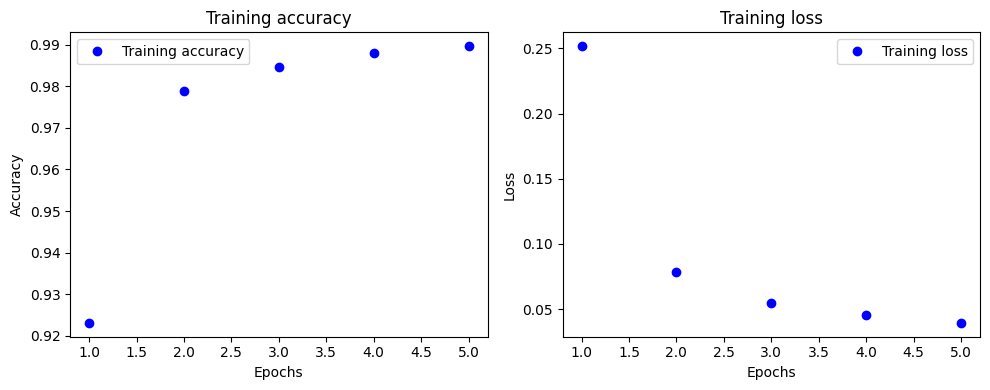

In [1]:
#This is a Convolutional Neural Network designed for handwritten digit classification using the MNIST dataset.
#Its primary objective is to accurately identify and categorize images of handwritten digits.
#The model's architecture consists of three sets of Convolutional and MaxPooling layers, which enable it to learn hierarchical features from the input images.
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

def preprocess_data(images, labels):
    images = images.reshape((images.shape[0], 28, 28, 1))
    images = images.astype('float32') / 255
    labels = to_categorical(labels)
    return images, labels

train_images, train_labels = preprocess_data(train_images, train_labels)
test_images, test_labels = preprocess_data(test_images, test_labels)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Add dropout to prevent overfitting
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, callbacks=[reduce_lr])

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_accuracy}')

def plot_training_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)
